In [1]:
#CART (Classification and Regression Trees) is very similar to C4.5, but it differs in that it supports numerical target variables
#(regression) and does not compute rule sets. CART constructs binary trees using the feature and threshold that yield the 
#largest information gain at each node.

#scikit-learn uses an optimized version of the CART algorithm; however, the scikit-learn implementation does not support
#categorical variables for now.

In [2]:
import random

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (ConfusionMatrixDisplay, accuracy_score,
                             confusion_matrix, f1_score)
from sklearn.model_selection import train_test_split
from sklearn.tree import (DecisionTreeClassifier, DecisionTreeRegressor,
                        export_text, plot_tree)

TEST_SIZE = 0.2
RANDOM_STATE = 37
MAX_DEPTH = 7

In [3]:
df = pd.read_csv('treino_sinais_vitais_com_label.txt', header=None,
                 usecols=[0,3, 4, 5, 6, 7])
df = df.rename(columns={0: 'linha',
                        3: 'qPA',
                        4: 'pulso',
                        5: 'resp',
                        6: 'gravid',
                        7: 'classe'})
df

,linha,qPA,pulso,resp,gravid,classe
0,1,8.416754,75.921057,21.635259,40.000000,2
1,2,8.725890,63.813564,19.718734,41.530427,2
2,3,0.000000,197.210213,19.045471,52.730745,3
3,4,8.733333,143.636181,17.621141,34.679911,2
4,5,1.747626,82.636672,12.209535,69.375882,3
...,...,...,...,...,...,...
1495,1496,4.774128,6.701052,7.380529,24.494467,1
1496,1497,8.400144,81.203081,13.630509,65.385011,3
1497,1498,4.768427,143.261527,21.843486,24.530704,1
1498,1499,1.707746,184.267283,14.256125,61.062546,3


## Classificação

In [4]:
#Divisao de testes e treino
x_class = df[['qPA', 'pulso', 'resp']]
y_class = df['classe']
        
xc_train, xc_test, yc_train, yc_test = train_test_split(
    x_class, y_class, test_size=TEST_SIZE, random_state=RANDOM_STATE)

In [5]:
## Modelagem
modelo = DecisionTreeClassifier(random_state=RANDOM_STATE, max_depth=MAX_DEPTH)
modelo.fit(xc_train, yc_train)

y_class_pred = modelo.predict(xc_test)
accuracy = accuracy_score(yc_test, y_class_pred)

Acurácia: 0.8966666666666666
F1-score:  0.8030166358408376


In [6]:
from sklearn.metrics import classification_report

print(classification_report(yc_test, y_class_pred, zero_division=1))

              precision    recall  f1-score   support

           1       0.87      1.00      0.93        40
           2       0.96      0.89      0.92       169
           3       0.83      0.89      0.86        85
           4       0.50      0.50      0.50         6

    accuracy                           0.90       300
   macro avg       0.79      0.82      0.80       300
weighted avg       0.90      0.90      0.90       300



In [12]:
#Arvore
r = export_text(modelo, feature_names=['qPA', 'pulso', 'resp'])
print(r)

|--- resp <= 11.34
|   |--- qPA <= 4.70
|   |   |--- qPA <= -4.72
|   |   |   |--- pulso <= 130.11
|   |   |   |   |--- pulso <= 45.76
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- pulso >  45.76
|   |   |   |   |   |--- pulso <= 122.10
|   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |--- pulso >  122.10
|   |   |   |   |   |   |--- resp <= 9.34
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- resp >  9.34
|   |   |   |   |   |   |   |--- class: 2
|   |   |   |--- pulso >  130.11
|   |   |   |   |--- resp <= 10.29
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- resp >  10.29
|   |   |   |   |   |--- class: 2
|   |   |--- qPA >  -4.72
|   |   |   |--- pulso <= 121.91
|   |   |   |   |--- pulso <= 57.13
|   |   |   |   |   |--- pulso <= 44.55
|   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |--- pulso >  44.55
|   |   |   |   |   |   |--- qPA <= 1.82
|   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |   |--- qPA >  1.82

In [8]:
# Inserir no dataframe
df['pred classif'] = modelo.predict(x_class)

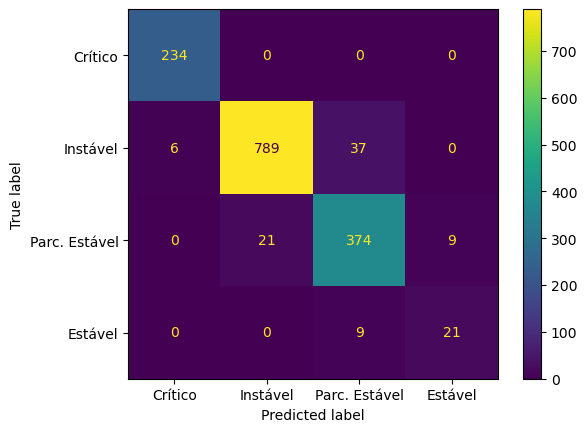

In [13]:
## Matriz de Confusão
matriz = confusion_matrix(df['classe'], df['pred classif'])

matriz_d = ConfusionMatrixDisplay(
    matriz, display_labels=['Crítico', 'Instável', 'Parc. Estável', 'Estável'])
matriz_d.plot()
plt.show()

## Regressão

In [10]:
x_reg = df[['qPA', 'pulso', 'resp']]
y_reg = df['gravid']
        
xr_train, xr_test, yr_train, yr_test = train_test_split(
    x_reg, y_reg, test_size=TEST_SIZE, random_state=RANDOM_STATE)

In [11]:
from sklearn.metrics import (r2_score,mean_squared_error)

model_r = DecisionTreeRegressor(random_state=RANDOM_STATE)
model_r.fit(xr_train, yr_train)

yr_pred = model_r.predict(xr_test)

print('R2: ', r2_score(yr_test, yr_pred))
print('MSE: ', mean_squared_error(yr_test, yr_pred))

R2:  0.9586854202619355
MSE:  11.47769926061997


In [14]:
df['pred_reg'] = modelo.predict(x_reg)

## Resposta

In [15]:
resp = df[['linha','pred classif', 'pred_reg']]
resp.to_csv('resp_arvore.csv', index=False)